# References

In [1]:
# References

# week11 - Demo_async (functional vs sequential API)
# week06 - FFNN_DiabeticRetinopathy (building a FFNN)
# week05 - imbalanced_data (standardization)
# week03 - linear_regression (keras linear regression model)

# Import packages and data

In [2]:
# standard
import pandas as pd
import numpy as np
import random
import os
import math

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

#silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Setting random seeds
random.seed(0)
np.random.seed(0)
tf.keras.backend.clear_session()
tf.random.set_seed(0)

2023-11-26 18:49:10.298437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Google Data Import

# Run to access your drive from google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

X_train = pd.read_csv('drive/MyDrive/data/X_train.csv')
Y_train = pd.read_csv('drive/MyDrive/data/Y_train.csv')
X_val = pd.read_csv('drive/MyDrive/data/X_val.csv')
Y_val = pd.read_csv('drive/MyDrive/data/Y_val.csv')

## Local Data Import

In [3]:
X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_val = pd.read_csv('X_val.csv')
Y_val = pd.read_csv('Y_val.csv')

## Required in Both

In [4]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
Y_train.drop(columns=['Unnamed: 0'], inplace=True)
X_val.drop(columns=['Unnamed: 0'], inplace=True)
Y_val.drop(columns=['Unnamed: 0'], inplace=True)

# Making a linear regression model

In [5]:
# Specifying the inputs - only edits needed in this cell are in this first section
columns = ['season_mapping', 'player_team_name_mapping', 'opp_team_name_mapping',
          'opp_diff_ind_mapping', 'position_mapping', 'gw_mapping', 'was_home_mapping',
         'assists_lag_5', 'bonus_lag_5', 'bps_lag_5', 'clean_sheets_lag_5',
          'creativity_lag_5', 'goals_conceded_lag_5', 'goals_scored_lag_5',
          'ict_index_lag_5', 'influence_lag_5', 'minutes_lag_5',
          'own_goals_lag_5', 'penalties_missed_lag_5', 'penalties_saved_lag_5',
          'red_cards_lag_5', 'saves_lag_5', 'selected_lag_5',
          'player_team_score_lag_5', 'opp_team_score_lag_5', 'threat_lag_5',
          'total_points_lag_5', 'value_lag_5', 'yellow_cards_lag_5']
learning_rate = 0.001
epoch_count = 5

# Getting the subset of columns
X_train_sub = X_train[columns]
X_val_sub = X_val[columns]

# Converting inputs into tensors
X_train_tf = tf.convert_to_tensor(X_train_sub)
X_val_tf = tf.convert_to_tensor(X_val_sub)
Y_train_tf = tf.convert_to_tensor(Y_train)
Y_val_tf = tf.convert_to_tensor(Y_val)

# Getting number of features
num_features = X_train_sub.shape[1]

In [6]:
# Building and compiling the model

model = tf.keras.Sequential()

# Create input layer
model.add(tf.keras.Input(shape=(num_features,), name='Input'
          ))

# Create output layer
model.add(tf.keras.layers.Dense(
          activation = None,    # linear activation is used
          units = 1,            # output dim - need to make sure this is correct
          use_bias = True             
          ))

# Select optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['accuracy']
    )

In [7]:
# Fitting the model
history = model.fit(
    x = X_train_tf,
    y = Y_train_tf,
    epochs = epoch_count,
    validation_data = (X_val_tf, Y_val_tf)
    )

Epoch 1/5
2150/2150 [==============================] - 2s 666us/step - loss: 8.4454 - accuracy: 0.4087 - val_loss: 4.7439 - val_accuracy: 0.3128
Epoch 2/5
2150/2150 [==============================] - 1s 632us/step - loss: 4.8328 - accuracy: 0.4364 - val_loss: 4.5902 - val_accuracy: 0.5006
Epoch 3/5
2150/2150 [==============================] - 1s 607us/step - loss: 4.8062 - accuracy: 0.4387 - val_loss: 4.5893 - val_accuracy: 0.5439
Epoch 4/5
2150/2150 [==============================] - 1s 621us/step - loss: 4.7982 - accuracy: 0.4409 - val_loss: 4.5715 - val_accuracy: 0.4628
Epoch 5/5
2150/2150 [==============================] - 1s 693us/step - loss: 4.7888 - accuracy: 0.4469 - val_loss: 4.5698 - val_accuracy: 0.5280


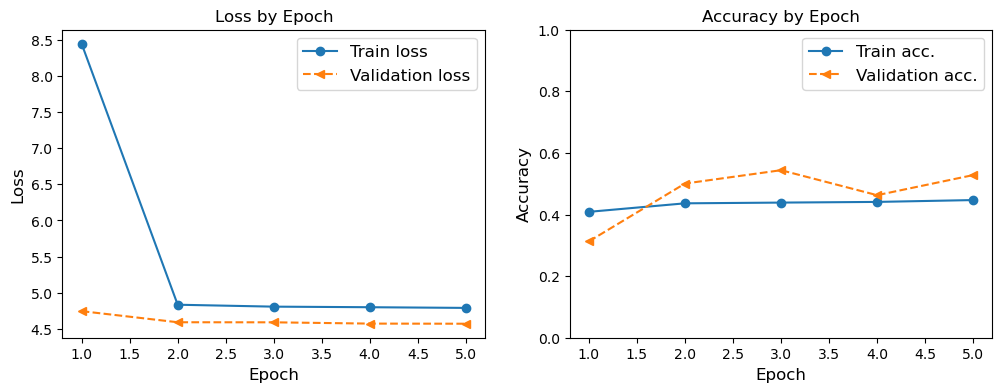

In [8]:
# Plotting loss and accuracy for training and validation sets
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=12)
ax.set_ylabel('Loss', size=12)
ax.set_title('Loss by Epoch')

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=12)
ax.set_ylabel('Accuracy', size=12)
ax.set_ylim(0,1)
ax.set_title('Accuracy by Epoch')
plt.show()

In [9]:
# Need to make sure the model interprets the categorical variables correctly

# Making a Baseline

In [10]:
# Setting up necessary functions

# Making a vector of predictions as long as the actuals
def pred_vect(true_values, prediction=2):
    predictions = []
    count = 0
    pred = prediction # Can pass baseline or 2
    while count < len(true_values):
        predictions.append(pred)
        count += 1
        
    return predictions

# Defining an MSE function
def MSE(true_values, predicted_values):
    """Return the RMSE between true_values and predicted values."""
    tot = 0
    count = 0
    
    # Calculating the SE for each data point
    while count < len(true_values):
        tot += (true_values[count] - predicted_values[count])**2
        count += 1
    
    # Returning the MSE
    return tot / len(true_values)

def accuracy(true_values, predicted_values):
    unique, counts = np.unique(true_values==predicted_values, return_counts=True)

    acc_dict = dict(zip(unique, counts))

    if True in acc_dict.keys():
        acc = counts[-1] / np.sum(counts)
    else:
        acc = 0       

    return f'Accuracy is {round(acc,2)*100}%'

In [11]:
# Creating a baseline with the average value
baseline = Y_train['total_points'].mean()
baseline
# Can't really use this, because partial values will have an accuracy of 0

1.3593784070590629

In [21]:
true = np.array(Y_train['total_points'])
pred = np.array(pred_vect(Y_train['total_points'],1))

print(accuracy(true, pred))
print(MSE(true, pred))

Accuracy is 15.0%
6.4320332601648476


# Making a NN

In [13]:
# Column combination possibilities

all_cols = X_train.columns

lag_1 = ['assists_lag_1', 'bonus_lag_1', 'bps_lag_1', 'clean_sheets_lag_1',
       'creativity_lag_1', 'goals_conceded_lag_1', 'goals_scored_lag_1',
       'ict_index_lag_1', 'influence_lag_1', 'minutes_lag_1',
       'own_goals_lag_1', 'penalties_missed_lag_1', 'penalties_saved_lag_1',
       'red_cards_lag_1', 'saves_lag_1', 'selected_lag_1',
       'player_team_score_lag_1', 'opp_team_score_lag_1', 'threat_lag_1',
       'total_points_lag_1', 'value_lag_1', 'yellow_cards_lag_1']

lag_3 = ['assists_lag_3', 'bonus_lag_3', 'bps_lag_3', 'clean_sheets_lag_3',
       'creativity_lag_3', 'goals_conceded_lag_3', 'goals_scored_lag_3',
       'ict_index_lag_3', 'influence_lag_3', 'minutes_lag_3',
       'own_goals_lag_3', 'penalties_missed_lag_3', 'penalties_saved_lag_3',
       'red_cards_lag_3', 'saves_lag_3', 'selected_lag_3',
       'player_team_score_lag_3', 'opp_team_score_lag_3', 'threat_lag_3',
       'total_points_lag_3', 'value_lag_3', 'yellow_cards_lag_3']

lag_5 = ['assists_lag_5', 'bonus_lag_5', 'bps_lag_5', 'clean_sheets_lag_5',
       'creativity_lag_5', 'goals_conceded_lag_5', 'goals_scored_lag_5',
       'ict_index_lag_5', 'influence_lag_5', 'minutes_lag_5',
       'own_goals_lag_5', 'penalties_missed_lag_5', 'penalties_saved_lag_5',
       'red_cards_lag_5', 'saves_lag_5', 'selected_lag_5',
       'player_team_score_lag_5', 'opp_team_score_lag_5', 'threat_lag_5',
       'total_points_lag_5', 'value_lag_5', 'yellow_cards_lag_5']

cat = ['season_mapping', 'player_team_name_mapping', 'opp_team_name_mapping',
       'opp_diff_ind_mapping', 'position_mapping', 'gw_mapping', 'was_home_mapping']

judgmental_imp = ['player_team_name_mapping', 'opp_team_name_mapping',
       'opp_diff_ind_mapping', 'position_mapping', 'was_home_mapping',
       'assists_lag_3', 'bonus_lag_3', 'goals_scored_lag_3', 'ict_index_lag_3', 
       'minutes_lag_3', 'red_cards_lag_3', 'selected_lag_3', 'player_team_score_lag_3', 
       'opp_team_score_lag_3', 'total_points_lag_3', 'value_lag_3', 'yellow_cards_lag_3'] # Uses lag 3 as a default

In [14]:
def loss_acc_plots(history):
    '''
    Takes in history from model fitting and plots loss and accuracy by epoch for both train and val
    '''
    hist = history.history
    x_arr = np.arange(len(hist['loss'])) + 1
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
    ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
    ax.legend(fontsize=12)
    ax.set_xlabel('Epoch', size=12)
    ax.set_ylabel('Loss', size=12)
    ax.set_title('Loss by Epoch')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
    ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
    ax.legend(fontsize=12)
    ax.set_xlabel('Epoch', size=12)
    ax.set_ylabel('Accuracy', size=12)
    ax.set_ylim(0,1)
    ax.set_title('Accuracy by Epoch')
    plt.show()

In [26]:
# Setup for testing different configurations

def create_nn(columns=all_cols, learning_rate=0.01, epoch_count=5, hidden_layer_sizes=[], 
              hl_act_func='relu', oput_act_func=None, optimizer='Adam', plot_flag=True,
              verbosity_flag=True):
    
    ############################################################################################## 1
    # Preparing the data
    
    # Getting the subset of columns
    X_train_sub = X_train[columns]
    X_val_sub = X_val[columns]
    
    # Converting inputs into tensors
    X_train_tf = tf.convert_to_tensor(X_train_sub)
    X_val_tf = tf.convert_to_tensor(X_val_sub)
    Y_train_tf = tf.convert_to_tensor(Y_train)
    Y_val_tf = tf.convert_to_tensor(Y_val)
    
    # Getting number of features
    num_features = X_train_sub.shape[1]

    ############################################################################################## 2
    # Building the model
    model = tf.keras.Sequential()

    # Create input layer
    model.add(tf.keras.Input(shape=(num_features,), name='Input'
              ))

    # (Optional) Create hidden layers
    for i, hidden_layer_size in enumerate(hidden_layer_sizes):
      model.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                     activation=hl_act_func,
                                     name = f'Hidden_{i+1}'))

    # (Optional) Create dropout
    
    # Create output layer
    model.add(tf.keras.layers.Dense(
              activation = oput_act_func,    # linear activation is used
              units = 1,                # output dim - need to make sure this is correct
              use_bias = True             
              ))
    
    # Select optimizer
    if optimizer == 'SGD':
      opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
      opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
      raise 'Unsupported optimizer: %s' %optimizer

    ############################################################################################## 3
    # Compiling the model
    model.compile(
        optimizer=opt,
        loss='mse', # Do we want RMSE?
        metrics=['accuracy']
        )

    ############################################################################################## 4
    # Fitting the model
    history = model.fit(
        x = X_train_tf,
        y = Y_train_tf,
        epochs = epoch_count,
        validation_data = (X_val_tf, Y_val_tf),
        verbose=verbosity_flag
    )

    ############################################################################################## 5
    # Displaying learning rates
    if plot_flag == True:
        loss_acc_plots(history)

Epoch 1/5
2150/2150 [==============================] - 2s 841us/step - loss: 4.7992 - accuracy: 0.4748 - val_loss: 4.5132 - val_accuracy: 0.5744
Epoch 2/5
2150/2150 [==============================] - 2s 811us/step - loss: 4.6812 - accuracy: 0.4966 - val_loss: 4.4537 - val_accuracy: 0.5550
Epoch 3/5
2150/2150 [==============================] - 2s 781us/step - loss: 4.6651 - accuracy: 0.5013 - val_loss: 4.4509 - val_accuracy: 0.5602
Epoch 4/5
2150/2150 [==============================] - 2s 787us/step - loss: 4.6501 - accuracy: 0.5063 - val_loss: 4.4442 - val_accuracy: 0.5212
Epoch 5/5
2150/2150 [==============================] - 2s 784us/step - loss: 4.6360 - accuracy: 0.5069 - val_loss: 4.4689 - val_accuracy: 0.5459


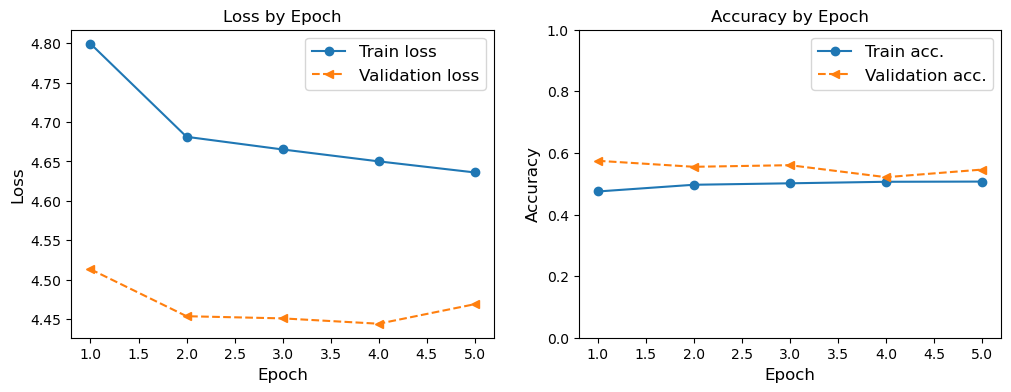

In [29]:
create_nn(learning_rate=0.001, columns=judgmental_imp, hidden_layer_sizes=[32, 64, 128], oput_act_func='relu')

In [ ]:
# Make a DF with columns for all the possible things you can change (AKA everything you pass into the function) outside the NN fucntion
# For every new NN model, append a row with these things and the final train and val loss and accuracy
# Make a range of scenarios to test (with multiple options for each potential change point)
# Test them and complete the table
# Sort the table by train loss (ascending) to select the most promising scenarios